# Kickstarter Dataset Exploratory Analysis

Here I will utilise pythons plotnine capabilities for visualisations and draw useful insights from the data regarding Kickstarter projects. 

### Description of the dataset: 

1. ID - ID of project 
2. name - Name of project 
3. catergory - category of project 
4. main_category
5. currency
6. deadline
7. goal - fundraising goal in original currency 
8. launched
9. pledged - amount raised in original currency
10. state - priject state statuses "successful","failed" , "cancelled", "live", "suspended", "undefined"
11. backers - number of people who donated to project
12. country
13. usd_pledged: conversion in US dollars of the pledged column (conversion done by kickstarter).
14. usd pledge real: conversion in US dollars of the pledged column (conversion from Fixer.io API).
15. usd goal real: conversion in US dollars of the goal column (conversion from Fixer.io API).

In [7]:
# import used  packages 
import numpy as np 
import pandas as pd
from plotnine import *

In [9]:
#read in data
df = pd.read_csv('ks-projects-201801.csv')

In [10]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09/10/2015,1000.0,11/08/2015 12:12,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01/11/2017,30000.0,02/09/2017 04:43,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26/02/2013,45000.0,12/01/2013 00:20,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16/04/2012,5000.0,17/03/2012 03:24,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,29/08/2015,19500.0,04/07/2015 08:35,1283.0,canceled,14,US,1283.0,1283.0,19500.00


We can immediately see that most of the data in our dataset is categorical and in text format. 

In [11]:
#check statistics:
df.describe(include = 'all')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,378657,378661,378661,378661,378661,3.786610e+05,378661,3.786610e+05,378661,378661.000000,378661,3.748640e+05,3.786610e+05,3.786610e+05
unique,NaN,375722,159,15,14,3164,NaN,347035,NaN,6,NaN,23,NaN,NaN,NaN
top,NaN,#NAME?,Product Design,Film & Video,USD,08/08/2014,NaN,20/06/2017 16:00,NaN,failed,NaN,US,NaN,NaN,NaN
freq,NaN,43,22314,63585,295365,705,NaN,15,NaN,197719,NaN,292627,NaN,NaN,NaN
mean,1.074731e+09,NaN,NaN,NaN,NaN,NaN,4.908079e+04,NaN,9.682979e+03,NaN,105.617476,NaN,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,NaN,NaN,NaN,NaN,NaN,1.183391e+06,NaN,9.563601e+04,NaN,907.185035,NaN,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,NaN,NaN,NaN,NaN,NaN,1.000000e-02,NaN,0.000000e+00,NaN,0.000000,NaN,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,NaN,NaN,NaN,NaN,NaN,2.000000e+03,NaN,3.000000e+01,NaN,2.000000,NaN,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,NaN,NaN,NaN,NaN,NaN,5.200000e+03,NaN,6.200000e+02,NaN,12.000000,NaN,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,NaN,NaN,NaN,NaN,NaN,1.600000e+04,NaN,4.076000e+03,NaN,56.000000,NaN,3.034090e+03,4.050000e+03,1.550000e+04


In [13]:
#checkign data types 
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

We have some null values in 'usd pledged'


In [14]:
df.isnull().sum(axis = 0)

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

## Data Cleansing

1. Droping columns we will not be using : 
    * goal
    * pledged
    * usd pledged
2. Converting date columsn into date datatype 
    * deadline 
    * launched 
2. Generating new attributes
    * year 
    * mil_usd_pledged_real
    * mil_usd_goal_real
    * time_diff : time length between when project was launched and project deadline

In [15]:
# droping columns 
df = df.drop(['goal', 'pledged', 'usd pledged'], 1)

In [16]:
# convert date columns to date format
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])
df['launched'] = (df['launched']).dt.strftime('%Y-%m-%d') 
df['launched'] = pd.to_datetime(df['launched'])
df.dtypes

ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
launched            datetime64[ns]
state                       object
backers                      int64
country                     object
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

In [17]:
df['year'] = df["launched"].dt.year.astype(str)
df['month'] = df["launched"].dt.month.astype(str)

In [18]:
df['mil_usd_pledged_real'] = df['usd_pledged_real']/1000000
df['mil_usd_goal_real'] = df['usd_goal_real']/1000000

# Exploratory Analysis 

* goal is to determing what characterises successful and failed projects
* there are 6 project statuses : cancelled, failed, live, successful , suspended , undefined
* our analysis we are only interested in successful and failed projects 


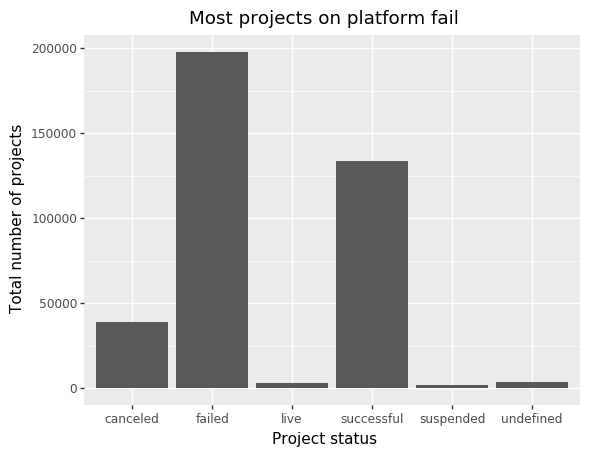

<ggplot: (-9223371892712943688)>

In [13]:
( 
    ggplot(df) 
    + aes(x = 'state')
    + geom_bar()
    + labs(title="Most projects on platform fail" , x = 'Project status' , y = 'Total number of projects')
)
#By default, geom_bar uses stat="count" which makes the height of the bar proportion to the number of cases in each group (or if the weight aethetic is supplied, the sum of the weights). 
#If you want the heights of the bars to represent values in the data, use stat="identity" and map a variable to the y aesthetic.

In [19]:
## focus on successful and failed projects only 
# Removing cancelled, suspended , undefined , live projects
df1 = df[df['state'].isin(['failed', 'successful'])]

# Which categories are more likely to be successful 

* We can see that Film&Video and Music have most successful projects , those are also the two categories under which the most projects are submitted
* So we also look at success rate for each project as perentage of total fo rthis category

In [11]:
sort_list = df1['main_category'].value_counts().to_frame('count').reset_index()
sort_list

,index,count
0,Film & Video,56527
1,Music,45949
2,Publishing,35445
3,Games,28521
4,Technology,27050
5,Art,25641
6,Design,25364
7,Food,22054
8,Fashion,19775
9,Theater,10242


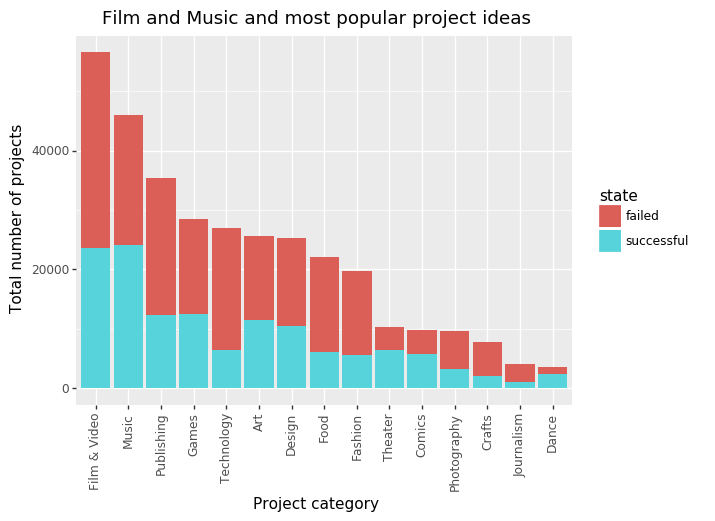

<ggplot: (-9223371892725417660)>

In [16]:
( 
    ggplot(df1) 
    + aes(x = 'main_category', fill = 'state')
    + geom_bar()
    + theme(axis_text_x=element_text(angle=90)) # rotate x-axis text for readability
    + scale_x_discrete(limits=sort_list['index'])
    + labs(title="Film and Music and most popular project ideas" , x = 'Project category' , y = 'Total number of projects')
)


# Success rate of different project areas

* Despite Film and Video being most popular category, Dance and Theatre have best overall success ratio for their projects


In [18]:
most_succesful_projects = (df1.groupby('main_category')['state']
                           .value_counts(normalize =True)
                           .sort_values()
                           .to_frame('percentage')
                           .reset_index())

most_succesful_projects

,main_category,state,percentage
0,Technology,successful,0.237856
1,Journalism,successful,0.243914
2,Crafts,successful,0.270530
3,Food,successful,0.275914
4,Fashion,successful,0.282832
5,Photography,successful,0.341108
6,Dance,failed,0.345648
7,Publishing,successful,0.347017
8,Theater,failed,0.362039
9,Comics,failed,0.408585


In [19]:
success_list = most_succesful_projects[most_succesful_projects['state']=='successful'] 
### created a list to sort the visualisation from most to least successful 

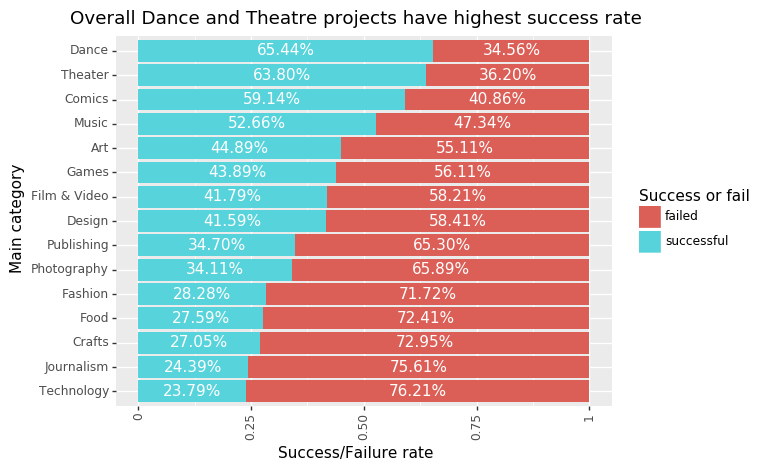

<ggplot: (-9223371892725499836)>

In [20]:
( 
    ggplot(most_succesful_projects)
    + aes(x = 'main_category', y ='percentage', fill = 'factor(state)')
    + geom_bar(stat = 'identity' , position = 'fill')
    + theme(axis_text_x=element_text(angle=90)) # rotate x-axis text for readability
    + coord_flip() # changing the direction of bars to horizonal 
    + geom_text(aes(label='round(percentage*100,2)') # Y value transformed as percentage 
                , stat='identity' # using Y value as label 
                , position=position_fill(vjust=0.5) # position label in center
                , colour ='white' # change colour of font
                , format_string='{:.2f}%')  # change text label format 
    + scale_x_discrete(limits=success_list['main_category']) # to quickly reorder a discrete axis without changing the data is to change it's limits
    + labs(title="Overall Dance and Theatre projects have highest success rate" , y = 'Success/Failure rate' , x = 'Main category' , fill = 'Success or fail')
)

# Heatmap of success rates per country  

* which categories are more successful in which countries
> Country value N"O" is NA, where not country value was found. Review of Kickstarter project page shows various countries. 

> To better show the distribution matrix also done using bubble heatmap / balloon matrix

In [21]:
most_succesful_projects_per_country = (df1.groupby(['main_category','country'])['state']
                           .value_counts(normalize =True)
                           .sort_values()
                           .to_frame('percentage')
                           .reset_index())# group by to create a df 

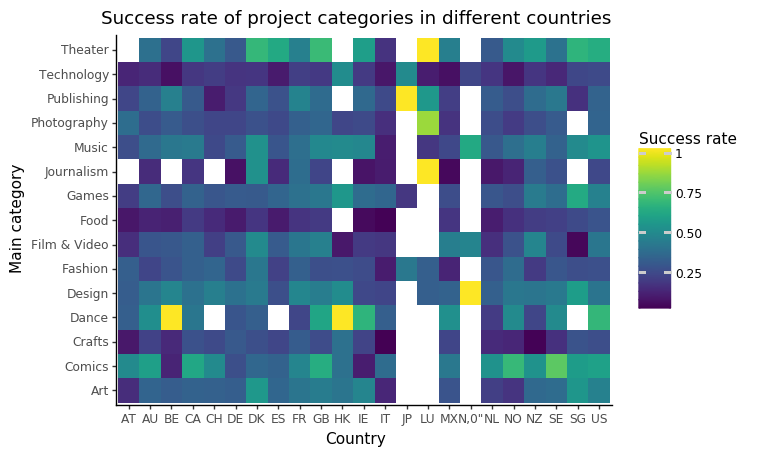

<ggplot: (-9223371892828125676)>

In [52]:
(
    ggplot(most_succesful_projects_per_country[most_succesful_projects_per_country['state']== 'successful']) 
    + aes(x ='country', y ='main_category', fill = 'percentage')
    + theme(figure_size = (12,12), axis_text_x=element_text(angle=90))
    + geom_bin2d(aes(width=.95, height=.95))
    #+ geom_text(aes(label='round(percentage,2)'), size=10, color='white', format_string='{:.1f}%')  # modified
    + theme_classic()# remove background grid 
    + labs(title="Success rate of project categories in different countries" , x = 'Country' , y = 'Main category' , fill = 'Success rate')
)


## What were the lanuch dates for each country 

In [24]:
launch_dt = df1.groupby(['country'])['launched'].agg(['min','max', 'count']).sort_values(by = 'min', ascending = False).reset_index()
launch_dt

,country,min,max,count
0,JP,2017-01-11,2017-12-09,23
1,MX,2016-01-12,2017-12-11,1411
2,HK,2016-01-09,2017-12-10,477
3,SG,2016-01-08,2017-12-11,454
4,LU,2015-06-22,2017-12-04,57
5,AT,2015-01-10,2017-12-23,485
6,BE,2015-01-09,2017-12-22,523
7,CH,2015-01-07,2017-12-14,652
8,ES,2015-01-07,2017-12-12,1873
9,IT,2015-01-07,2017-12-11,2369


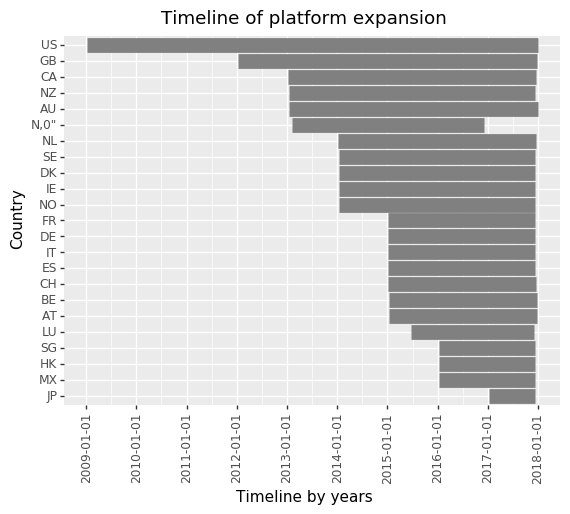

<ggplot: (-9223371892837103624)>

In [25]:
(
    ggplot(launch_dt)

    # Range strip
    + geom_segment(
     aes(x= 'min' , xend='max', y='country', yend='country'),
     size=6,
     colour='grey')
    + theme(axis_text_x=element_text(angle=90)) # rotate x-axis text for readability
    + scale_y_discrete(limits=launch_dt['country'])
    + labs(title="Timeline of platform expansion" , x = 'Timeline by years' , y = 'Country')
)

In [132]:
dotsize = df1.groupby(['main_category', 'country']).agg({'backers':sum, 'usd_pledged_real' :sum, 'ID':'count'}).rename(columns={'ID':'count'}).reset_index()

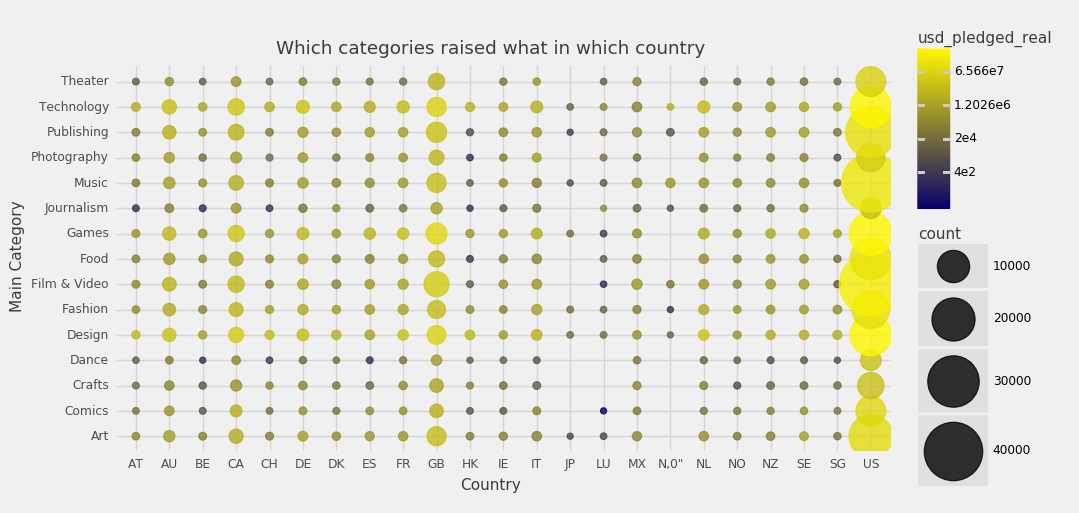

<ggplot: (-9223371892832200988)>

In [133]:
# visualising this as bubble heatmap to also show the number of projects
(
    ggplot(dotsize)
 + aes(x ='country', y ='main_category', #fill = 'percentage', 
       colour = 'usd_pledged_real' , 
       size = 'count'
       )
 + geom_point(alpha = 0.8)
 + theme_538()# remove background grid  
 + scale_colour_gradient(trans = 'log', low ='#07006b', high='#fff700') # adding log gradient colour/ using log because of high value variance 
 + scale_size_continuous(range = (2, 25))
 + labs(title="Which categories raised what in which country" , x = 'Country' , y = 'Main Category')
 + theme(figure_size = (10, 5) ) 
)
#low='#00AFBB', high='#F8766D' / #ff0062

In [134]:
dotsize2 = df1.groupby(['main_category', 'country','state']).agg({'backers':sum, 'usd_pledged_real' :sum, 'ID':'count'}).rename(columns={'ID':'count'}).reset_index()

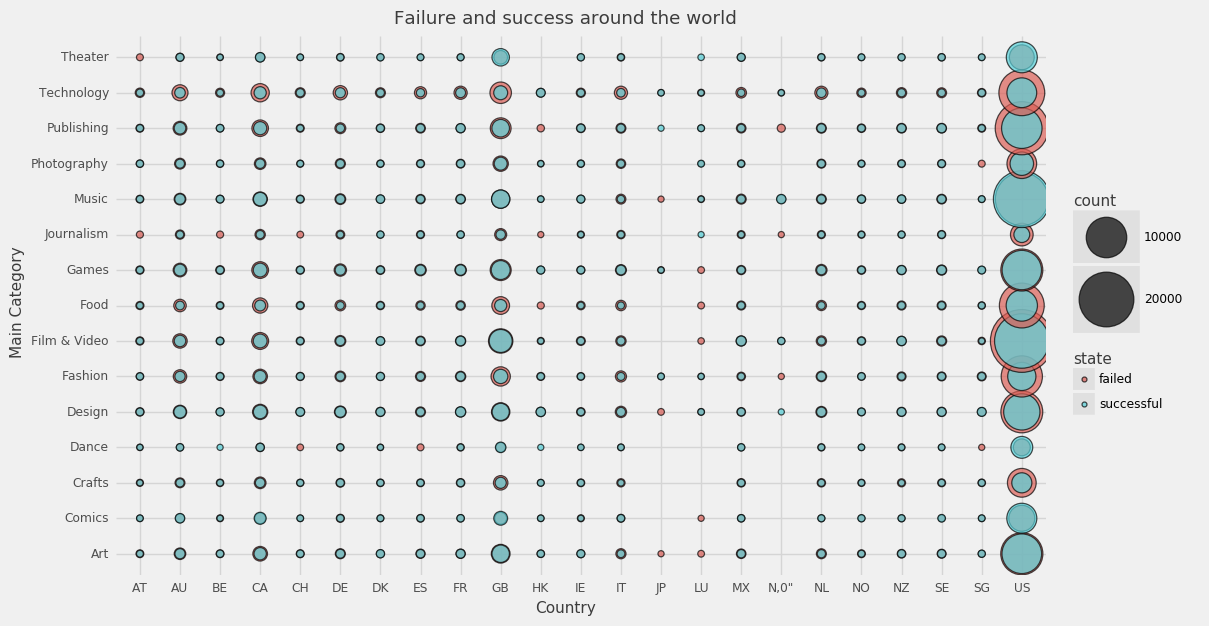

<ggplot: (-9223371892821598740)>

In [140]:
# visualising this as bubble heatmap to also show the number of projects
(
    ggplot(dotsize2)
 + aes(x ='country', y ='main_category', #fill = 'percentage',  
       size = 'count', 
       fill = 'state'
       )
 + geom_point(alpha = 0.7)
 + theme_538()# remove background grid  
 #+ scale_colour_gradient(trans = 'log', low ='#07006b', high='#fff700') # adding log gradient colour/ using log because of high value variance 
 + scale_size_continuous(range = (2, 25))
 + labs(title="Failure and success around the world" , x = 'Country' , y = 'Main Category')
 + theme(figure_size = (12, 7) ) 
)
#low='#00AFBB', high='#F8766D' / #ff0062

# How much different categories raise 

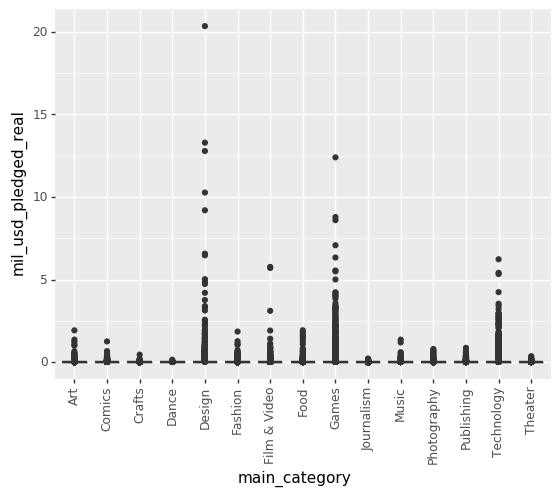

<ggplot: (-9223371892836563648)>

In [29]:
( 
    ggplot(df1) 
    + aes(x = 'main_category' , y = 'mil_usd_pledged_real')
    + geom_boxplot()
    + theme(axis_text_x=element_text(angle=90)) # rotate x-axis text for readability
)

# Projects over time 

Comments: 
* long running time in ggplot when consuming whole dataset, created year column to create a timeline plot 
* we can see a big fall in usage in 2016 and 2017, but a number of successful projects has decreased only slightly 

What does this mean for kickstarter? 
* how does it compare to amount raised
* is there more or less participants?
* is it decline in usage or is it better quality projects?

 ## Findings: 
 
### Categories 
* We can see that Comics and Games were two categories of projects which did not decline 
* Possible that kickstarter has found it's niche target population
### Countries
* Kickstarter has begun in the US and continued to have a strong presence there. 
* Despite a significant decline from it's peak in 2015, the number of successful projects declined only slightly
* European countries were late-comers to the platform with many countries showing increase in 2015. 

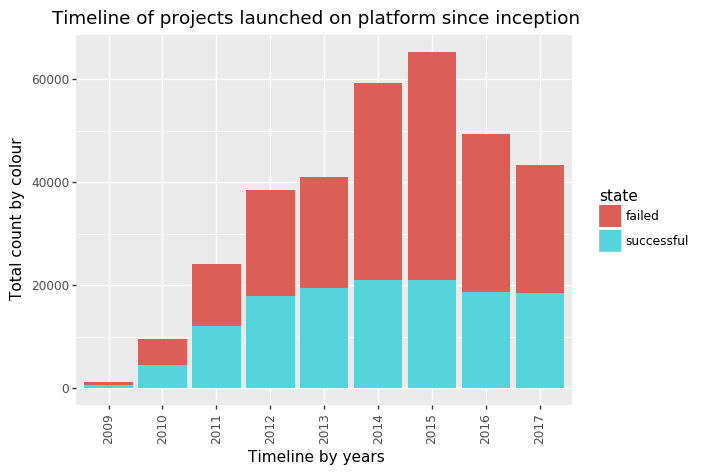

<ggplot: (-9223371892835983116)>

In [30]:
(
    ggplot(df1) 
    + aes(x = 'year' , fill = 'state')
    + geom_bar()
    + theme(axis_text_x=element_text(angle=90)) 
    + labs(title="Timeline of projects launched on platform since inception" , x = 'Timeline by years' , y = 'Total count by colour')
)   

In [23]:
df_year = (df1.groupby(['year','main_category'])['usd_pledged_real'].sum().to_frame('sum').reset_index().sort_values(by = 'sum'))# group by to create a df 

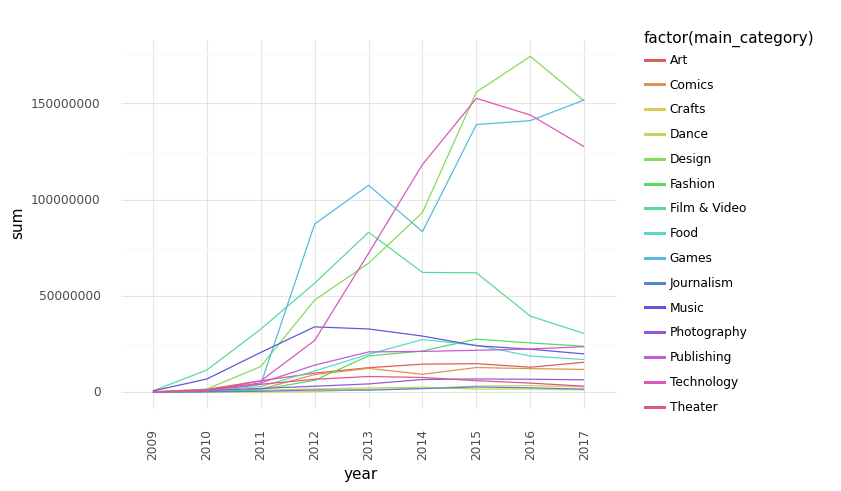

<ggplot: (104109376681)>

In [24]:
(
    ggplot(df_year) 
    + aes(x = 'year' , y ='sum', colour = "factor(main_category)", group = "main_category")
    + geom_line()
    + theme_minimal()
    + theme(axis_text_x=element_text(angle=90)) 
)   

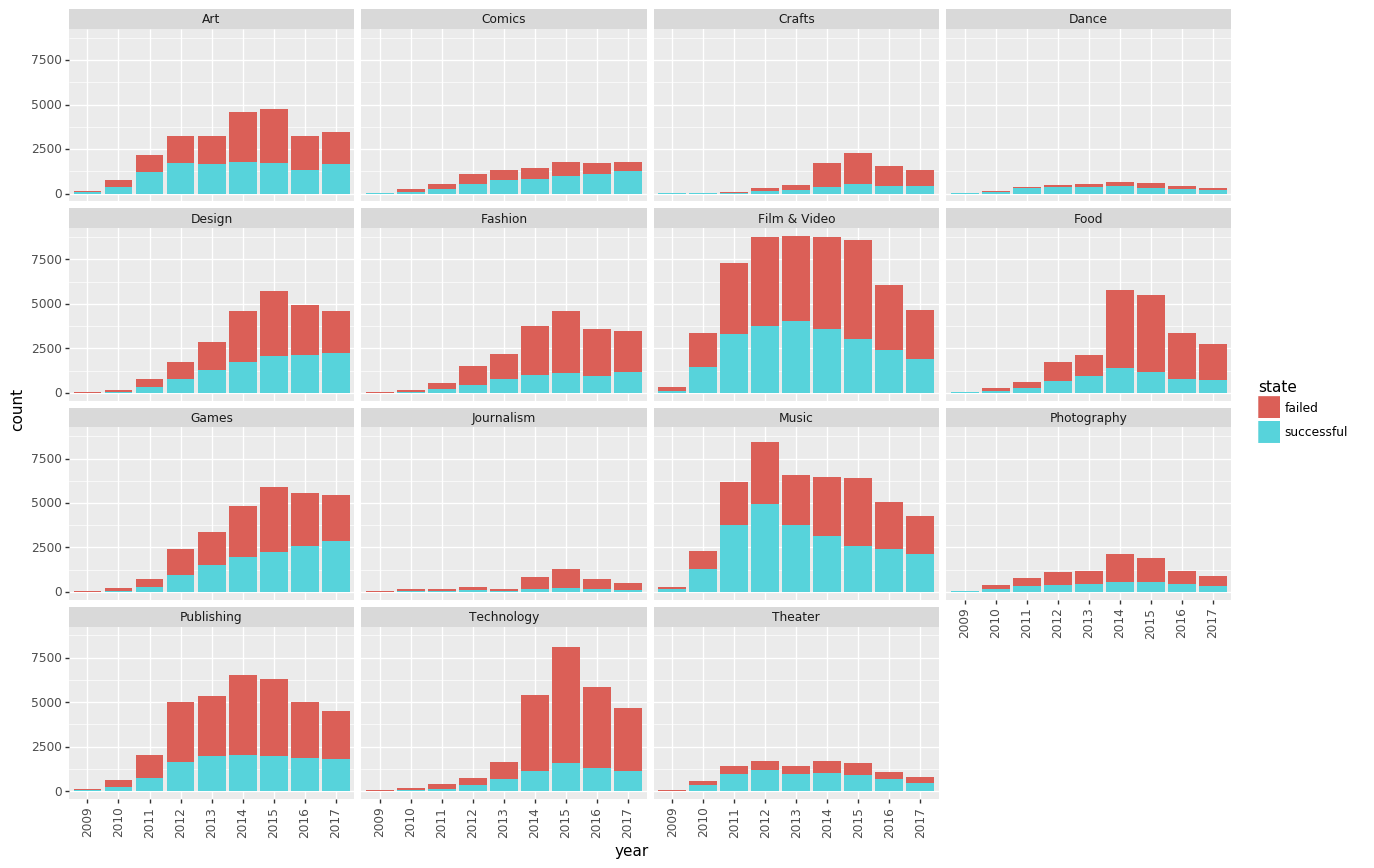

<ggplot: (-9223371892835832544)>

In [32]:
(
    ggplot(df1) 
    + aes(x = 'year' , fill = 'state')
    + geom_bar()
    + facet_wrap ('~main_category')
    + theme(figure_size = (15, 10) , axis_text_x=element_text(angle=90))
)   

# using faceting to see the timeline of each category 

#facet_wrap(~variable) will return a symmetrical matrix of plots for the number of levels of variable.
#facet_grid(.~variable) will return facets equal to the levels of variable distributed horizontally.
#facet_grid(variable~.) will return facets equal to the levels of variable distributed vertically.

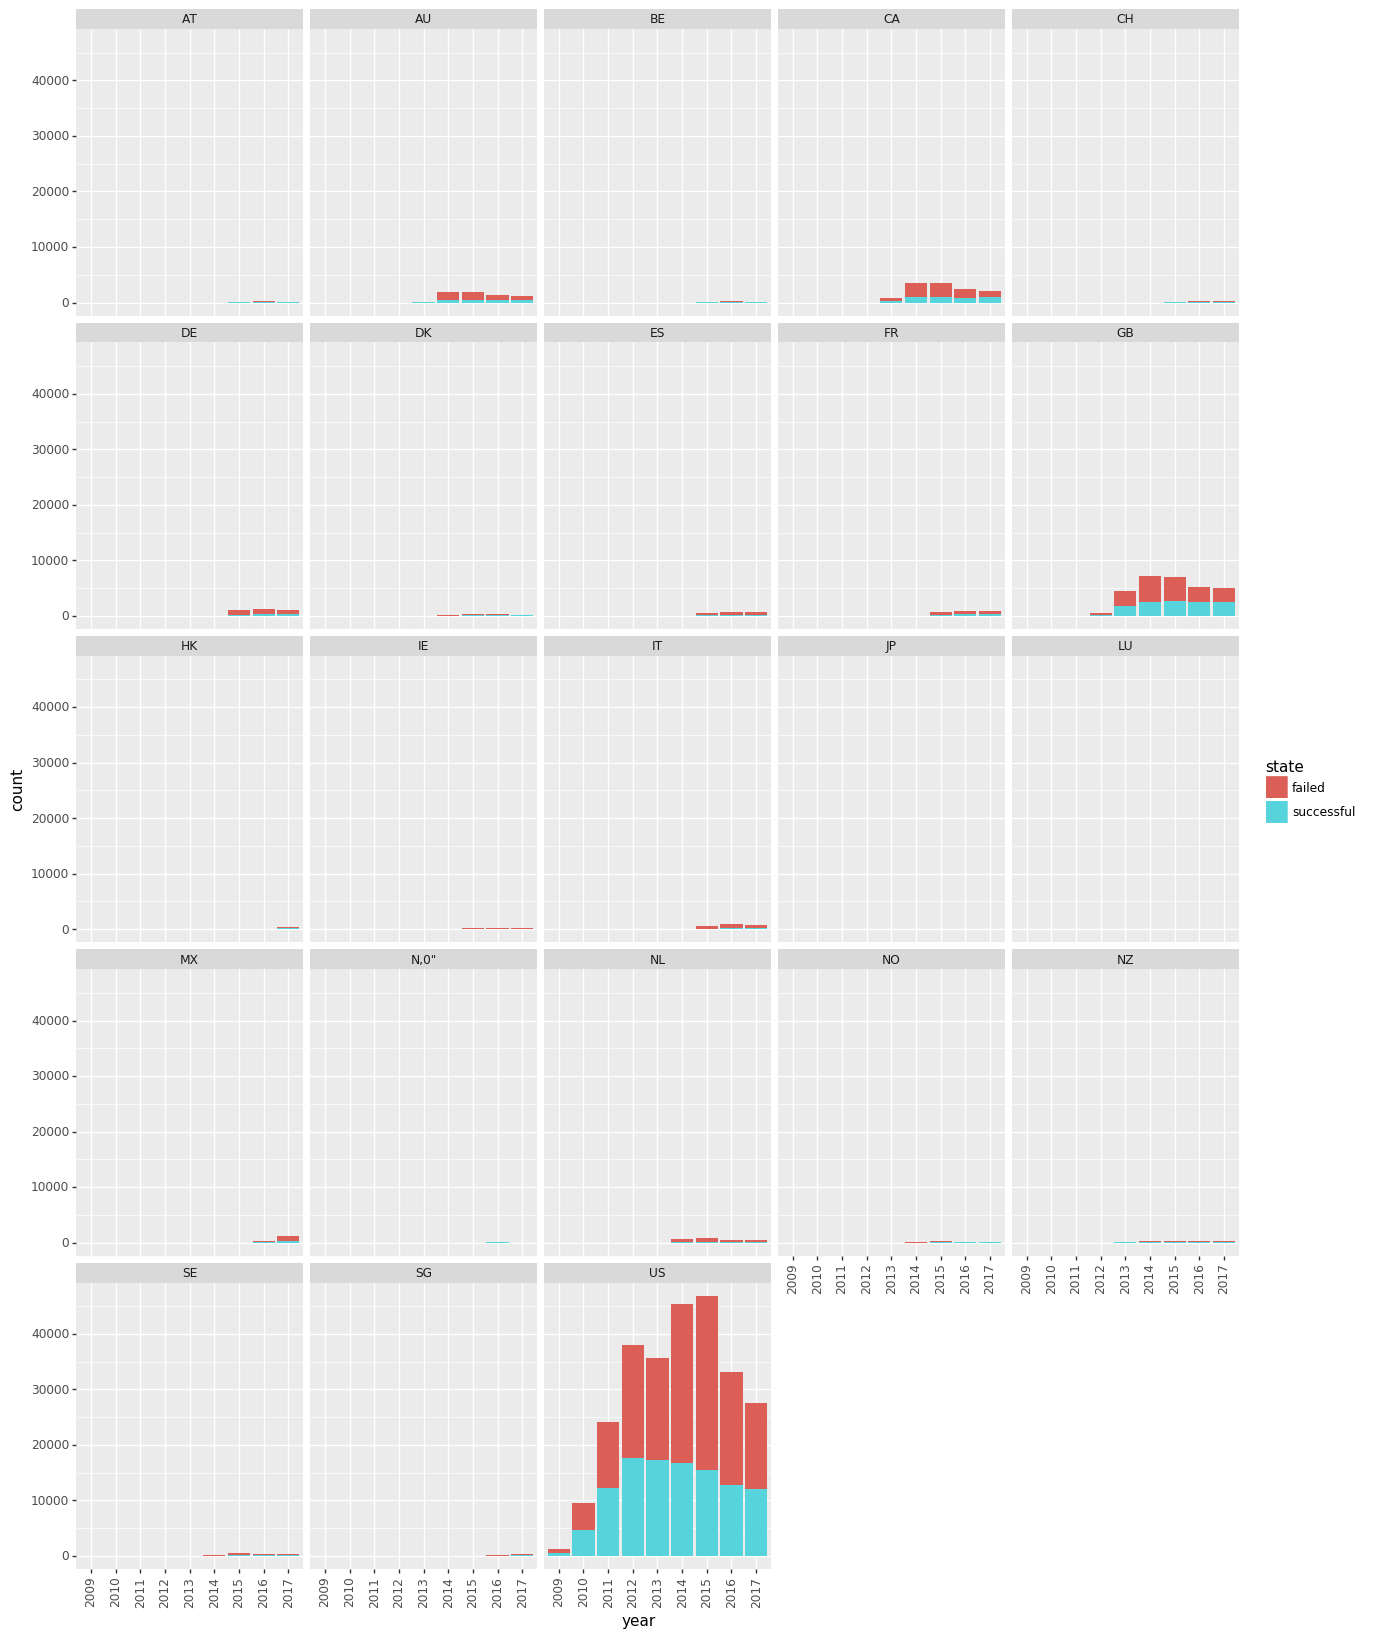

<ggplot: (-9223371892834540436)>

In [33]:
(
    ggplot(df1) 
    + aes(x = 'year' , fill = 'state')
    + geom_bar()
    + facet_wrap('~country')
    + theme(figure_size = (15, 20) , axis_text_x=element_text(angle=90))
)   

# using faceting to see the timeline of each category 

## USD Raised for projects

* We can see that the amount of money raised has only fallen slightly 

### Categories: 
* funding for games category has been increasing despite the fall in funding for other categories (reinforcing the point that kickstarter has found it's dedicated audience) 
### Countries:
* Most significant decline of funding from US but decline softened by entry into Europe
* UK consistent contirbutor


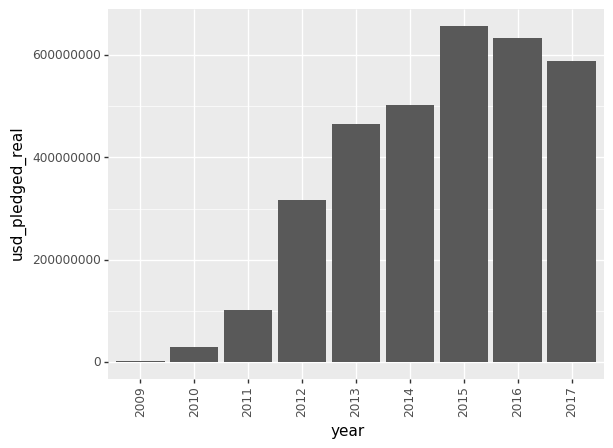

<ggplot: (-9223371892835359504)>

In [34]:
(
    ggplot(df1) 
    + aes(x = 'year' , y ='usd_pledged_real')
    + geom_bar(stat = 'identity')
    + theme(axis_text_x=element_text(angle=90)) 
)   

In [35]:
df4 = df1.groupby(['launched','main_category'])['usd_pledged_real'].agg(['sum','count']).reset_index()
df4

,launched,main_category,sum,count
0,2009-01-05,Art,25.00,1
1,2009-01-05,Music,4100.60,1
2,2009-01-05,Publishing,760.00,1
3,2009-01-05,Theater,575.00,1
4,2009-01-06,Music,3444.22,3
...,...,...,...,...
37692,2017-12-23,Games,269.84,1
37693,2017-12-26,Games,544.77,1
37694,2017-12-27,Fashion,202.00,1
37695,2017-12-28,Games,265.00,1


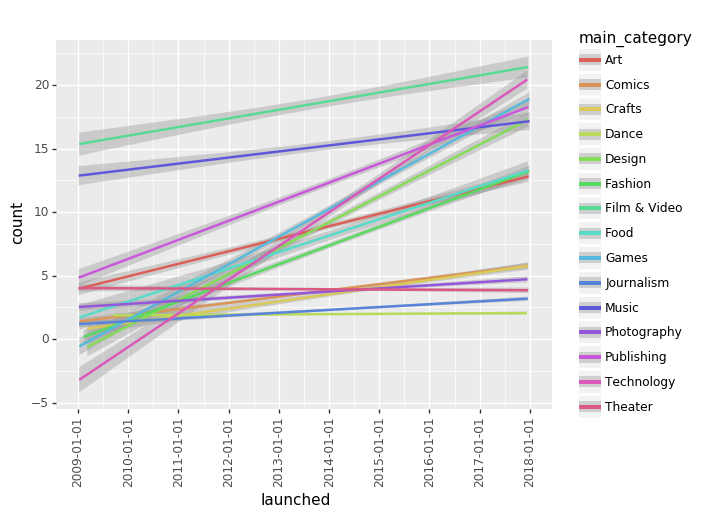

<ggplot: (-9223371892835567144)>

In [36]:
(ggplot(df4) 
 + aes(x='launched', y = 'count', color='main_category')
   ## + geom_line()
    + geom_smooth()
    + theme(axis_text_x=element_text(angle=90))
)

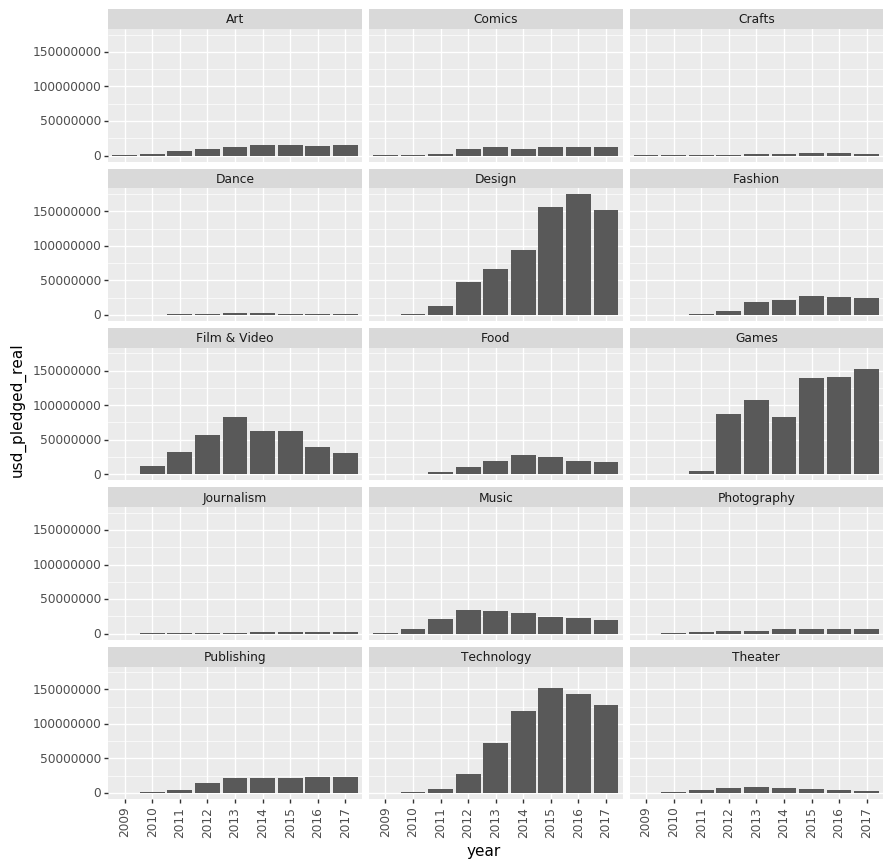

<ggplot: (-9223371892835353868)>

In [38]:
(
    ggplot(df1) 
    + aes(x = 'year' , y ='usd_pledged_real')
    + geom_bar(stat = 'identity')
    + facet_wrap ('~ main_category', nrow = 5)
    + theme(figure_size = (10, 10) , axis_text_x=element_text(angle=90))
)   

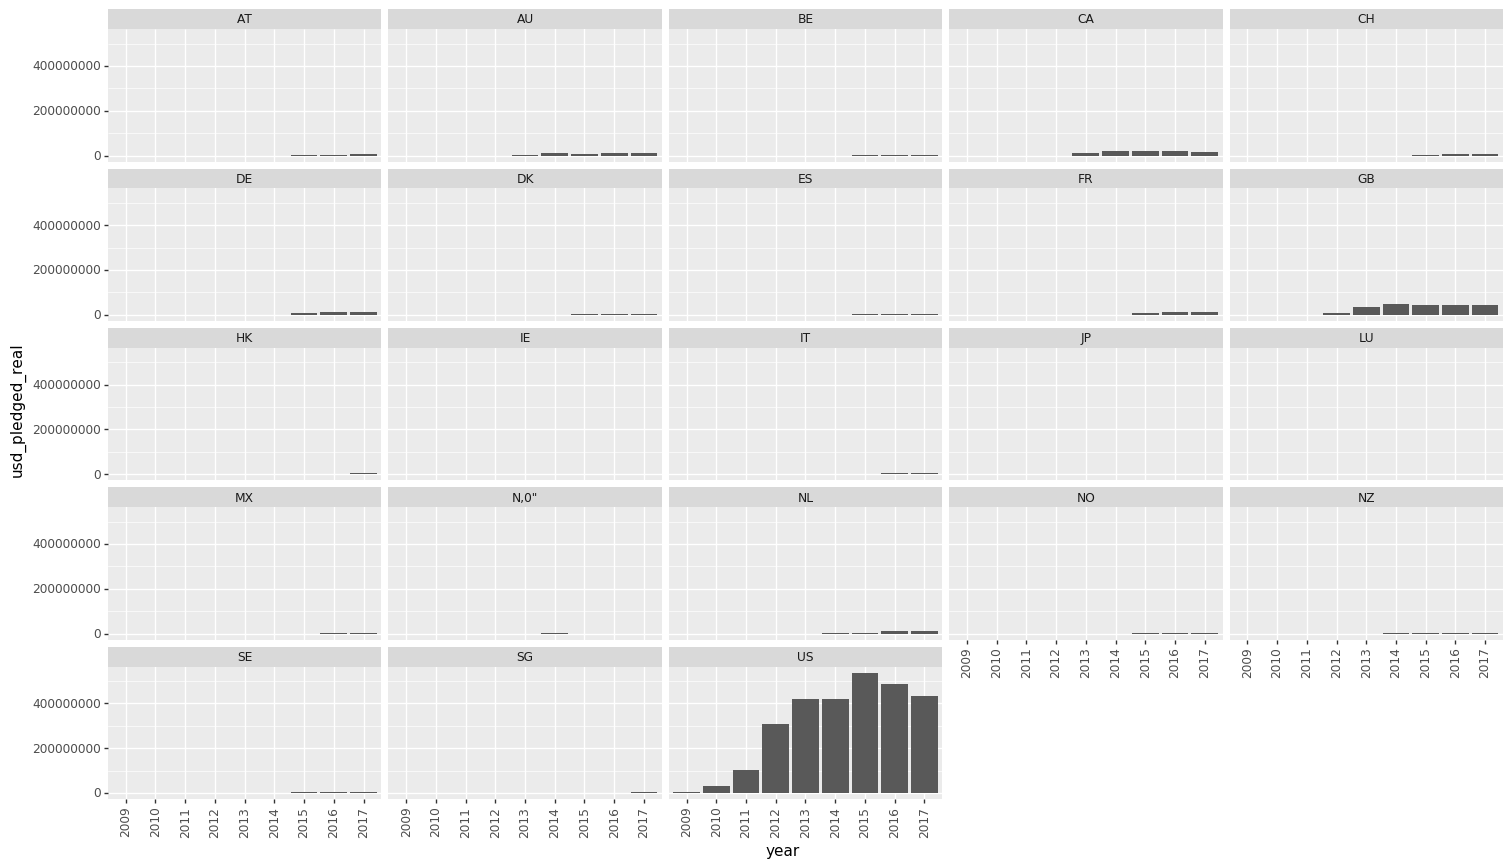

<ggplot: (-9223371892835798760)>

In [39]:
(
    ggplot(df1) 
    + aes(x = 'year' , y ='usd_pledged_real')
    + geom_bar(stat = 'identity')
    + facet_wrap ('~ country')
    + theme(figure_size = (18, 10) , axis_text_x=element_text(angle=90))
)   

# Let's see what happened with the Games projects

* Number of successful projects and projects submitted has been rising


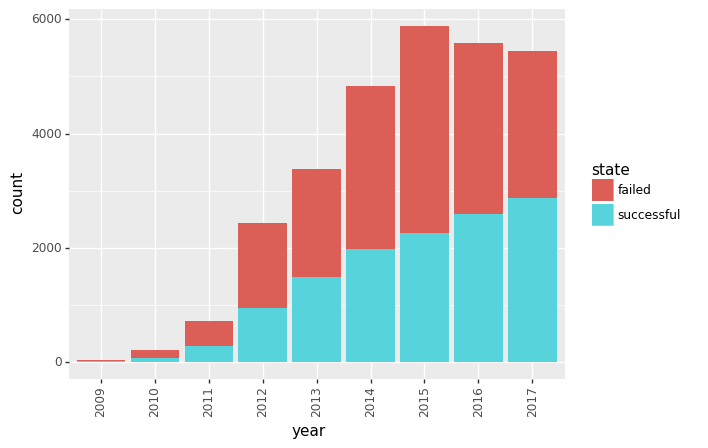

<ggplot: (-9223371892831666156)>

In [40]:
( 
    ggplot(df1[df1['main_category']== 'Games']) 
    + aes(x = 'year', fill = 'state')
    + geom_bar()
    + theme(axis_text_x=element_text(angle=90)) # rotate x-axis text for readability
)
# can I add amoutn pledged to this chart?

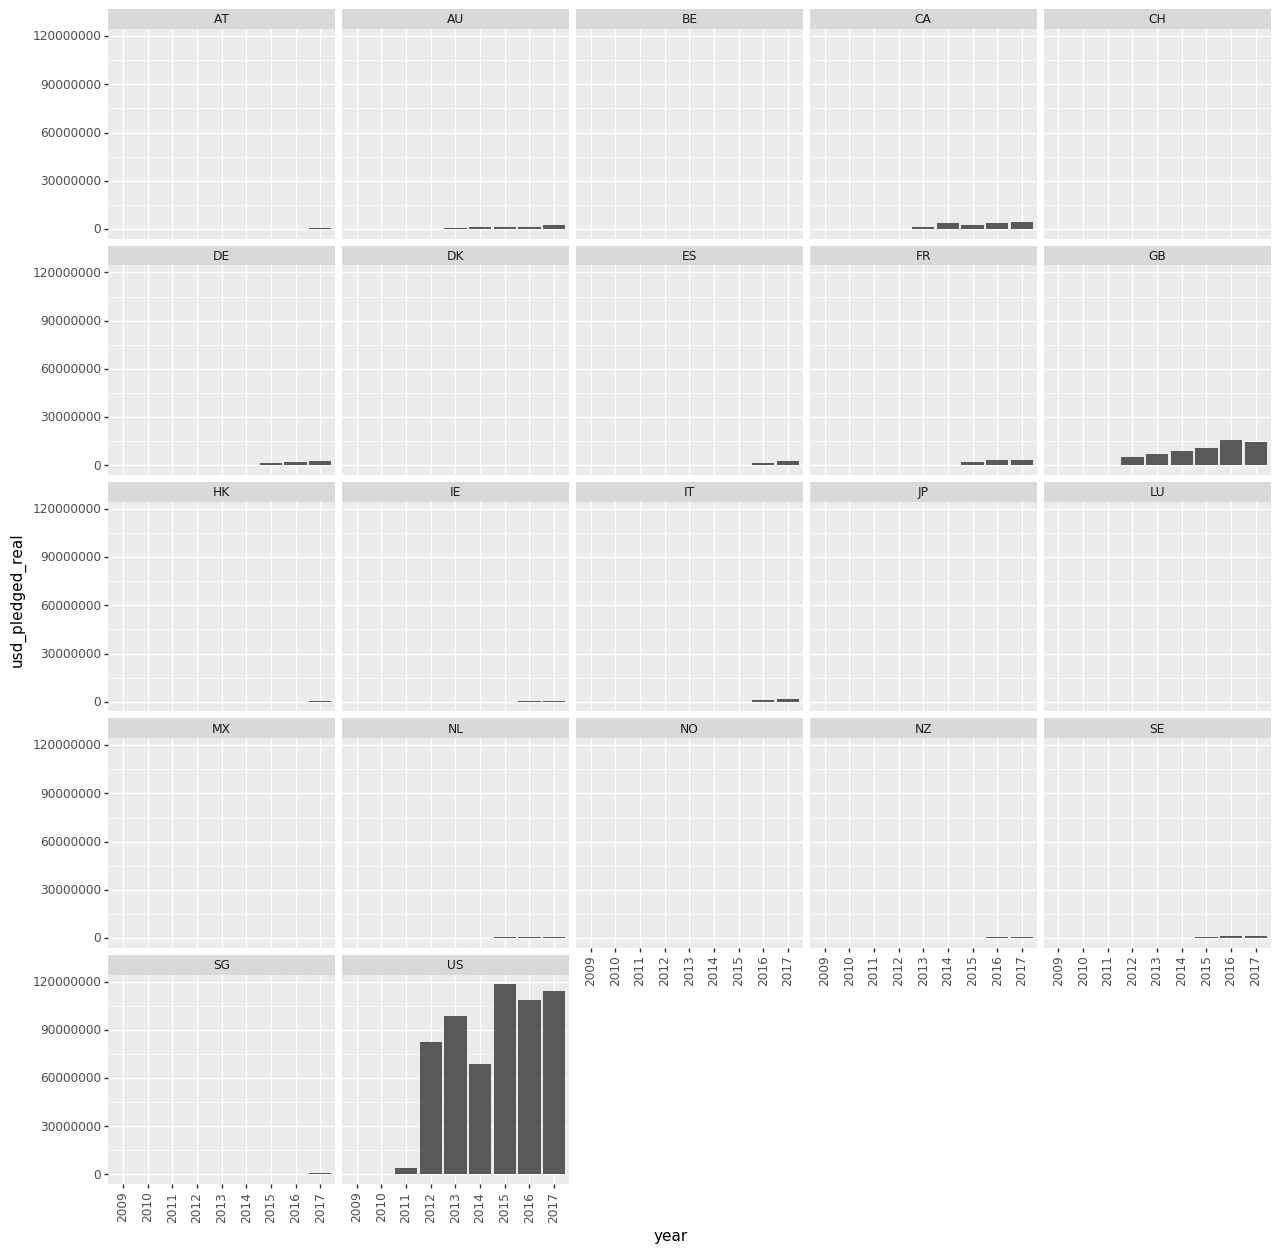

<ggplot: (-9223371892835326184)>

In [41]:
( 
    ggplot(df1[df1['main_category']== 'Games']) 
    + aes(x = 'year', y = 'usd_pledged_real')
    + geom_bar(stat = 'identity')
    + facet_wrap ('country')
    + theme(figure_size = (15, 15) , axis_text_x=element_text(angle=90))
)

# Successful and failed projects and number of backers 

* Many sponsors does not always mean a larger amoutn is raised 
* with plotly we're able to achieve similar interractivity as with tableau and we can dig into individual projects 
* With plotly we can see that a project "Kingdom Death: Monster 1.5" can achieve more funding despite less people backing it

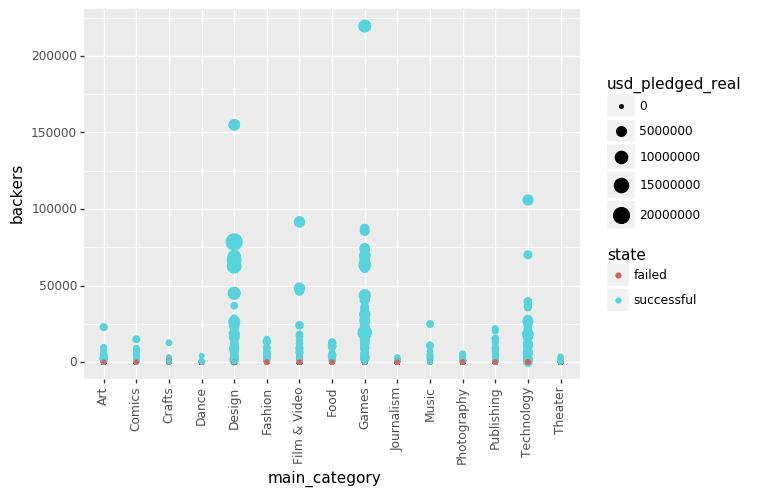

<ggplot: (-9223371892836239292)>

In [45]:
( 
ggplot(df1)
+ aes(x = 'main_category', y = 'backers')
+ geom_point(aes(col='state' , size = 'usd_pledged_real', colour = 'state'))
+ theme(axis_text_x=element_text(angle=90)) 
)
#TypeError: can only concatenate str (not "float") to str when adding  size = 'usd_pledged_real'